5
<class 'numpy.ndarray'>


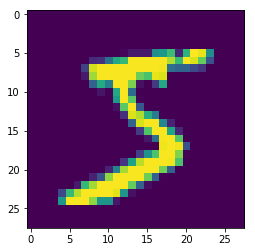

In [0]:
import numpy as np
from keras.models import Sequential

import matplotlib.pyplot as plt
#%matplotlib inline

from keras.layers import Dense, Dropout,Activation,Flatten
from keras.layers import Convolution2D,MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(y_train[0])
plt.imshow(x_train[0])
print(type(x_train))


In [0]:
x_train=x_train.reshape(x_train.shape[0],1,28,28)
x_test=x_test.reshape(x_test.shape[0],1,28,28)
print(x_train[0,0,14,14])
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train = x_train/255
x_test = x_test/255
y_train




240


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [0]:
# 1-hot encoding
y_train[0]
y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)
#print(y_train)

**Create Neural network Arch.**

In [0]:
model=Sequential()

In [0]:
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(1,28,28),data_format='channels_first'))


In [0]:
model.add(MaxPooling2D(pool_size=(2,2)))


In [0]:
model.add(Flatten())


In [0]:
model.add(Dense(128,activation='relu'))

In [0]:
model.add(Dropout(0.4))
model.add(Dense(10,activation='softmax'))
#help(model.compile)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
model.fit(x_train,y_train,batch_size=32,epochs=2,verbose=1)

Epoch 1/2
60000/60000 [==============================] - 54s 898us/step - loss: 0.2890 - acc: 0.9135
Epoch 2/2
60000/60000 [==============================] - 54s 905us/step - loss: 0.1019 - acc: 0.9701


In [24]:
score=model.evaluate(x_test,y_test,verbose=1)
score

10000/10000 [==============================] - 3s 260us/step


[0.051558269036817365, 0.9831]